In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import plotly


In [2]:
df_times = pd.read_csv('timesData.csv')
df_times.head(5)


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [3]:
df_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [4]:
df_times.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


In [5]:
df_times.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [6]:
#unique values from year column and count
df_times.year.value_counts()



2016    800
2012    402
2015    401
2013    400
2014    400
2011    200
Name: year, dtype: int64

In [7]:
#divide the the rankings based on years into groups, 100 best universities for each year
df_times_2011 = df_times[df_times.year == 2011].iloc[:100,:]
df_times_2012 = df_times[df_times.year == 2012].iloc[:100,:]
df_times_2013 = df_times[df_times.year == 2013].iloc[:100,:]
df_times_2014 = df_times[df_times.year == 2014].iloc[:100,:]
df_times_2015 = df_times[df_times.year == 2015].iloc[:100,:]
df_times_2016 = df_times[df_times.year == 2016].iloc[:100,:]

In [8]:
#show the top 5 universities for each year
df_times_2011.head(10)


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


In [9]:
df_times_2012.head(10)


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
200,1,California Institute of Technology,United States of America,95.7,56.0,98.2,99.9,97.0,94.8,"2,243",6.9,27%,33 : 67,2012
201,2,Harvard University,United States of America,95.8,67.5,97.4,99.8,35.9,93.9,"20,152",8.9,25%,NaN,2012
202,2,Stanford University,United States of America,94.8,57.2,98.9,99.8,63.8,93.9,"15,596",7.8,22%,42 : 58,2012
203,4,University of Oxford,United Kingdom,89.5,91.9,96.6,97.9,62.1,93.6,"19,919",11.6,34%,46 : 54,2012
204,5,Princeton University,United States of America,91.5,49.6,99.1,100.0,81.0,92.9,"7,929",8.4,27%,45 : 55,2012
205,6,University of Cambridge,United Kingdom,90.5,85.3,94.2,97.3,55.5,92.4,"18,812",11.8,34%,46 : 54,2012
206,7,Massachusetts Institute of Technology,United States of America,92.7,79.2,87.4,100.0,94.4,92.3,"11,074",9.0,33%,37 : 63,2012
207,8,Imperial College London,United Kingdom,88.8,92.2,88.7,93.9,93.1,90.7,"15,060",11.7,51%,37 : 63,2012
208,9,University of Chicago,United States of America,89.4,58.8,90.8,99.4,-,90.2,"14,221",6.9,21%,42 : 58,2012
209,10,"University of California, Berkeley",United States of America,82.8,50.4,99.4,99.4,62.5,89.8,"36,186",16.4,15%,50 : 50,2012


In [10]:
df_times_2013.head(10)


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
602,1,California Institute of Technology,United States of America,96.3,59.8,99.4,99.7,95.6,95.5,"2,243",6.9,27%,33 : 67,2013
603,2,Stanford University,United States of America,95.0,56.6,98.8,99.3,62.4,93.7,"15,596",7.8,22%,42 : 58,2013
604,2,University of Oxford,United Kingdom,89.7,88.7,98.1,95.6,79.8,93.7,"19,919",11.6,34%,46 : 54,2013
605,4,Harvard University,United States of America,94.9,63.7,98.6,99.2,39.9,93.6,"20,152",8.9,25%,NaN,2013
606,5,Massachusetts Institute of Technology,United States of America,92.9,81.6,89.2,99.9,92.9,93.1,"11,074",9.0,33%,37 : 63,2013
607,6,Princeton University,United States of America,89.5,54.5,99.4,99.8,79.5,92.7,"7,929",8.4,27%,45 : 55,2013
608,7,University of Cambridge,United Kingdom,91.2,83.6,95.6,96.2,59.1,92.6,"18,812",11.8,34%,46 : 54,2013
609,8,Imperial College London,United Kingdom,88.0,91.4,90.9,93.0,87.5,90.6,"15,060",11.7,51%,37 : 63,2013
610,9,"University of California, Berkeley",United States of America,85.1,49.7,99.3,99.3,65.4,90.5,"36,186",16.4,15%,50 : 50,2013
611,10,University of Chicago,United States of America,89.6,55.3,92.9,98.7,-,90.4,"14,221",6.9,21%,42 : 58,2013


In [11]:
df_times_2014.head(10)


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014
1005,4,Stanford University,United States of America,94.7,68.0,96.8,99.1,61.3,93.8,"15,596",7.8,22%,42 : 58,2014
1006,5,Massachusetts Institute of Technology,United States of America,92.9,82.0,89.0,100.0,94.3,93.0,"11,074",9.0,33%,37 : 63,2014
1007,6,Princeton University,United States of America,89.9,59.6,97.6,99.7,80.5,92.7,"7,929",8.4,27%,45 : 55,2014
1008,7,University of Cambridge,United Kingdom,90.6,86.7,95.3,95.7,52.8,92.3,"18,812",11.8,34%,46 : 54,2014
1009,8,"University of California, Berkeley",United States of America,83.2,57.3,97.5,99.3,59.5,89.8,"36,186",16.4,15%,50 : 50,2014
1010,9,University of Chicago,United States of America,85.6,58.6,88.2,98.0,-,87.8,"14,221",6.9,21%,42 : 58,2014
1011,10,Imperial College London,United Kingdom,84.5,91.8,88.1,90.0,72.3,87.5,"15,060",11.7,51%,37 : 63,2014


In [12]:
df_times_2015.head(10)


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1402,1,California Institute of Technology,United States of America,92.2,67.0,98.1,99.7,89.1,94.3,"2,243",6.9,27%,33 : 67,2015
1403,2,Harvard University,United States of America,92.9,67.6,98.6,98.9,44.0,93.3,"20,152",8.9,25%,NaN,2015
1404,3,University of Oxford,United Kingdom,88.6,90.7,97.7,95.5,72.9,93.2,"19,919",11.6,34%,46 : 54,2015
1405,4,Stanford University,United States of America,91.5,69.0,96.7,99.1,63.1,92.9,"15,596",7.8,22%,42 : 58,2015
1406,5,University of Cambridge,United Kingdom,89.7,87.8,95.6,95.2,51.1,92.0,"18,812",11.8,34%,46 : 54,2015
1407,6,Massachusetts Institute of Technology,United States of America,89.1,84.3,88.2,100.0,95.7,91.9,"11,074",9.0,33%,37 : 63,2015
1408,7,Princeton University,United States of America,86.6,61.2,94.7,99.6,82.7,90.9,"7,929",8.4,27%,45 : 55,2015
1409,8,"University of California, Berkeley",United States of America,84.2,58.5,96.7,99.1,44.8,89.5,"36,186",16.4,15%,50 : 50,2015
1410,9,Imperial College London,United Kingdom,84.6,92.7,88.3,89.4,72.7,87.5,"15,060",11.7,51%,37 : 63,2015
1411,9,Yale University,United States of America,88.5,59.8,90.8,94.0,42.0,87.5,"11,751",4.4,20%,50 : 50,2015


In [13]:
df_times_2016.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46 : 54,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42 : 58,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,"18,812",11.8,34%,46 : 54,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,"11,074",9.0,33%,37 : 63,2016
1808,6,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,"20,152",8.9,25%,NaN,2016
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,"7,929",8.4,27%,45 : 55,2016
1810,8,Imperial College London,United Kingdom,83.3,96.0,88.5,96.7,53.7,89.1,"15,060",11.7,51%,37 : 63,2016
1811,9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80.0,88.3,"18,178",14.7,37%,31 : 69,2016
1812,10,University of Chicago,United States of America,85.7,65.0,88.9,99.2,36.6,87.9,"14,221",6.9,21%,42 : 58,2016


In [14]:
#check the rankings of harvard university for each year in times ranking
df_times[df_times.university_name == 'Harvard University']


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
201,2,Harvard University,United States of America,95.8,67.5,97.4,99.8,35.9,93.9,"20,152",8.9,25%,NaN,2012
605,4,Harvard University,United States of America,94.9,63.7,98.6,99.2,39.9,93.6,"20,152",8.9,25%,NaN,2013
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1403,2,Harvard University,United States of America,92.9,67.6,98.6,98.9,44.0,93.3,"20,152",8.9,25%,NaN,2015
1808,6,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,"20,152",8.9,25%,NaN,2016


In [15]:
#check the rankings of California Institute of Technology for each year 
df_times[df_times.university_name == 'California Institute of Technology']


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
200,1,California Institute of Technology,United States of America,95.7,56.0,98.2,99.9,97.0,94.8,"2,243",6.9,27%,33 : 67,2012
602,1,California Institute of Technology,United States of America,96.3,59.8,99.4,99.7,95.6,95.5,"2,243",6.9,27%,33 : 67,2013
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1402,1,California Institute of Technology,United States of America,92.2,67.0,98.1,99.7,89.1,94.3,"2,243",6.9,27%,33 : 67,2015
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016


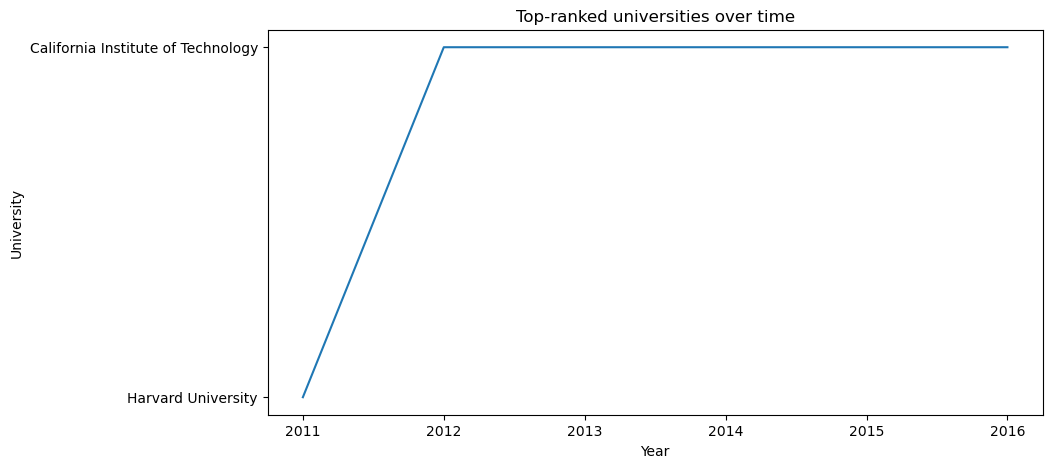

In [16]:
# Group the data by year and find the top-ranked university for each year
top_universities = df_times.groupby('year')['university_name'].first()
#visualize top-ranked universities over time
plt.figure(figsize=(10,5))
plt.plot(top_universities.index, top_universities.values)
plt.xticks(np.arange(2011, 2017, 1))
plt.xlabel('Year')
plt.ylabel('University')
plt.title('Top-ranked universities over time')
plt.show()



In [17]:
#checking unique values from world rank column
df_times.world_rank.value_counts()


301-350    248
601-800    200
351-400    198
276-300    104
201-225    103
          ... 
=110         2
=123         2
=125         2
=60          2
179          1
Name: world_rank, Length: 250, dtype: int64

In [18]:
df_cwur = pd.read_csv('cwurData.csv')
df_cwur.head(5)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [19]:
df_cwur.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [20]:
df_cwur.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [21]:
#unique values from year column and count
df_cwur.year.value_counts()

2014    1000
2015    1000
2012     100
2013     100
Name: year, dtype: int64

In [22]:
#null values
df_cwur.isnull().sum()


world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [23]:
#unique values of all columns
df_cwur.nunique()

world_rank              1000
institution             1024
country                   59
national_rank            229
quality_of_education     367
alumni_employment        565
quality_of_faculty       199
publications             987
influence                944
citations                135
broad_impact             343
patents                  738
score                    764
year                       4
dtype: int64

In [24]:
#data types of columns
df_cwur.dtypes


world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [25]:
df_cwur.head(5)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [26]:
#best 100 universities in each year
df_cwur_2012 = df_cwur[df_cwur.year == 2012].iloc[:100,:]
df_cwur_2013 = df_cwur[df_cwur.year == 2013].iloc[:100,:]
df_cwur_2014 = df_cwur[df_cwur.year == 2014].iloc[:100,:]
df_cwur_2015 = df_cwur[df_cwur.year == 2015].iloc[:100,:]


In [27]:
#show the top 10 universities for each year
df_cwur_2012.head(10)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


In [28]:
df_cwur_2013.head(10)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
100,1,Harvard University,USA,1,1,1,1,1,1,1,NaN,7,100.00,2013
101,2,Stanford University,USA,2,11,2,4,6,2,2,NaN,11,93.94,2013
102,3,University of Oxford,United Kingdom,1,7,12,10,11,7,13,NaN,15,92.54,2013
103,4,Massachusetts Institute of Technology,USA,3,2,16,2,16,3,3,NaN,1,91.45,2013
104,5,University of Cambridge,United Kingdom,2,3,15,5,9,11,10,NaN,39,90.24,2013
105,6,Columbia University,USA,4,13,8,9,13,9,11,NaN,10,88.21,2013
106,7,"University of California, Berkeley",USA,5,6,28,6,8,6,4,NaN,19,85.07,2013
107,8,Princeton University,USA,6,4,14,3,58,35,27,NaN,101,82.17,2013
108,9,University of Chicago,USA,7,9,19,8,37,21,30,NaN,101,79.16,2013
109,10,Yale University,USA,8,10,25,13,20,12,22,NaN,42,78.83,2013


In [29]:
df_cwur_2014.head(10)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
205,6,Columbia University,USA,4,13,8,9,14,13,9,13.0,4,97.41,2014
206,7,"University of California, Berkeley",USA,5,4,22,6,7,4,3,7.0,28,92.84,2014
207,8,University of Chicago,USA,6,10,14,8,17,19,10,18.0,149,92.03,2014
208,9,Princeton University,USA,7,5,16,3,70,25,19,41.0,204,88.56,2014
209,10,Yale University,USA,8,9,25,11,18,7,32,19.0,45,88.11,2014


In [30]:
df_cwur_2015.head(10)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015
1203,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,13.0,48,96.81,2015
1204,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,9.0,15,96.46,2015
1205,6,Columbia University,USA,4,13,6,9,13,13,11,12.0,4,96.14,2015
1206,7,"University of California, Berkeley",USA,5,5,21,6,10,4,4,7.0,29,92.25,2015
1207,8,University of Chicago,USA,6,11,14,8,17,16,12,22.0,141,90.70,2015
1208,9,Princeton University,USA,7,4,15,3,72,25,24,33.0,225,89.42,2015
1209,10,Cornell University,USA,8,12,18,14,24,15,25,22.0,11,86.79,2015


In [31]:
df_cwur.skew()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21464\3415505860.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_cwur.skew()


world_rank              0.108113
national_rank           1.974774
quality_of_education   -1.000067
alumni_employment      -0.508695
quality_of_faculty     -1.540628
publications            0.110559
influence               0.107385
citations               0.063364
broad_impact            0.007746
patents                -0.001490
score                   4.184903
year                   -1.223656
dtype: float64

In [32]:
#check the rankings of harvard university for each year in cwur ranking
df_cwur[df_cwur.institution == 'Harvard University']


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.0,2012
100,1,Harvard University,USA,1,1,1,1,1,1,1,NaN,7,100.0,2013
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.0,2014
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.0,2015


In [33]:
#check the rankings of Stanford University for each year in cwur ranking
df_cwur[df_cwur.institution == 'Stanford University']


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
101,2,Stanford University,USA,2,11,2,4,6,2,2,NaN,11,93.94,2013
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015


In [34]:
#check the rankings of MIT for each year in cwur ranking
df_cwur[df_cwur.institution == 'Massachusetts Institute of Technology']

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
103,4,Massachusetts Institute of Technology,USA,3,2,16,2,16,3,3,NaN,1,91.45,2013
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015


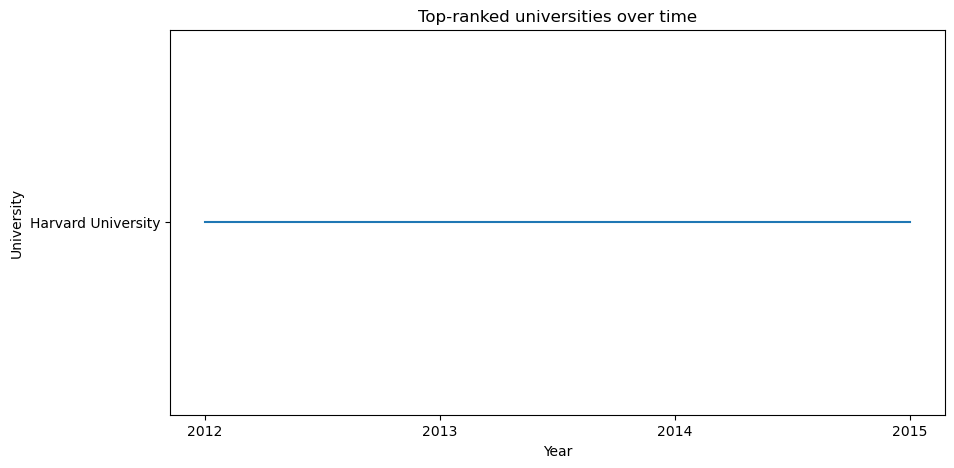

In [35]:
# Group the data by year and find the top-ranked university for each year
top_universities = df_cwur.groupby('year')['institution'].first()
#visualize top-ranked universities over time
plt.figure(figsize=(10,5))
plt.plot(top_universities.index, top_universities.values)
plt.xticks(np.arange(2012, 2016, 1))
plt.xlabel('Year')
plt.ylabel('University')
plt.title('Top-ranked universities over time')
plt.show()


In [36]:
#correration matrix
df_cwur.corr()



,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.942998,0.698214,-0.549098,0.320844
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.173043,0.159440,-0.199756,0.102951
quality_of_education,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.521615,0.528120,-0.600541,0.427732
alumni_employment,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.423619,0.528219,-0.510374,0.427710
quality_of_faculty,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.549345,0.555107,-0.693540,0.484788
publications,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.917878,0.671558,-0.522111,0.318245
influence,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.916040,0.611811,-0.522837,0.318298
citations,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.852638,0.598728,-0.522438,0.328771
broad_impact,0.942998,0.173043,0.521615,0.423619,0.549345,0.917878,0.916040,0.852638,1.000000,0.562861,-0.531590,-0.000124
patents,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,0.562861,1.000000,-0.474810,0.368570


In [37]:
#covaeriance matrix
df_cwur.cov()


,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,92610.883046,3756.208897,25090.710964,37999.668548,12940.021084,85325.970338,82697.881289,68913.128033,78124.813157,58218.971227,-1296.844868,74.413990
national_rank,3756.208897,2677.117668,1337.353580,1307.965670,738.478596,5137.155941,2528.196358,2555.112610,2653.468893,2260.347442,-80.212209,4.059697
quality_of_education,25090.710964,1337.353580,14868.168622,13811.196536,6140.110828,23136.694494,23880.176763,20323.080392,15994.173538,17644.381289,-568.300430,39.749287
alumni_employment,37999.668548,1307.965670,13811.196536,34886.488848,6682.961227,32458.514088,29879.417455,27612.293206,20890.475419,27032.610725,-739.815933,60.884596
quality_of_faculty,12940.021084,738.478596,6140.110828,6682.961227,4102.515913,12343.406787,12753.093334,11043.414574,8259.593611,9741.978720,-344.749347,23.664972
publications,85325.970338,5137.155941,23136.694494,32458.514088,12343.406787,92270.351358,80618.202976,66645.291893,76024.618017,55893.294051,-1230.838437,73.675286
influence,82697.881289,2528.196358,23880.176763,29879.417455,12753.093334,80618.202976,92010.194174,67777.798857,75775.229924,50848.789510,-1230.811052,73.583716
citations,68913.128033,2555.112610,20323.080392,27612.293206,11043.414574,66645.291893,67777.798857,69889.672098,61194.223232,43369.161000,-1071.885442,66.241432
broad_impact,78124.813157,2653.468893,15994.173538,20890.475419,8259.593611,76024.618017,75775.229924,61194.223232,82322.945673,41928.455188,-1005.202078,-0.017759
patents,58218.971227,2260.347442,17644.381289,27032.610725,9741.978720,55893.294051,50848.789510,43369.161000,41928.455188,75074.095530,-1009.651954,76.965232


In [38]:
#show which rows have null values in broad_impact column
df_cwur[df_cwur.broad_impact.isnull()]



,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,96,Australian National University,Australia,2,101,101,43,101,101,101,NaN,101,44.50,2013
196,97,University of Alberta,Canada,4,101,101,101,68,101,92,NaN,81,44.50,2013
197,98,University of Helsinki,Finland,1,69,101,81,74,79,71,NaN,101,44.39,2013
198,99,Paris Diderot University - Paris 7,France,5,28,101,72,101,87,101,NaN,101,44.36,2013


In [39]:
#create a copy of the dataframe
df_cwur_copy = df_cwur.copy()


In [40]:
#drop the broad_impact column
df_cwur_copy.drop('broad_impact', axis=1, inplace=True)



In [41]:
df_cwur_copy.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'patents', 'score', 'year'],
      dtype='object')

In [42]:
#types of columns
df_cwur_copy.dtypes


world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
patents                   int64
score                   float64
year                      int64
dtype: object

In [50]:
#drop categorical columns
df_cwur_copy.drop(['country', 'institution'], axis=1, inplace=True)

In [51]:
#check the columns
df_cwur_copy.columns


Index(['world_rank', 'national_rank', 'quality_of_education',
       'alumni_employment', 'quality_of_faculty', 'publications', 'influence',
       'citations', 'patents', 'score', 'year'],
      dtype='object')

In [52]:
#check the null values
df_cwur_copy.isnull().sum()


world_rank              0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
patents                 0
score                   0
year                    0
dtype: int64

In [53]:
#select target variable
y = df_cwur_copy.world_rank
X = df_cwur_copy.drop('world_rank', axis=1)
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
#check the shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1540, 10)
(660, 10)
(1540,)
(660,)


In [61]:
#fit the model
model = LinearRegression()
model.fit(X_train, y_train)
#predict the values
y_pred = model.predict(X_test)
#check the accuracy
from sklearn.metrics import r2_score, mean_squared_error
print('R2 score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
#additional accuracy metrics
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test, y_pred))




R2 score: 0.9108708782996918
RMSE: 90.78017328634327
MAE: 65.23008113928485


In [55]:
#check the coefficients
model.coef_


array([-2.99033607e-02,  9.96507385e-02,  3.07401838e-01, -1.64154125e-02,
        4.18225045e-01,  2.89997909e-01,  1.48335778e-01,  8.42898071e-02,
        1.04461134e+00, -2.51769128e+01])

In [56]:
#check the intercept
model.intercept_


50567.933861890364

In [57]:
#check the mean of target variable
y.mean()


459.59090909090907

In [58]:
#check the mean of predicted values
y_pred.mean()


463.72797039080797

In [59]:
#check the mean of actual values
y_test.mean()


461.8984848484848

In [62]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
#fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)
#predict the values
y_pred = model.predict(X_test)
#check the accuracy
print('R2 score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
#additional accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSLE:', mean_squared_log_error(y_test, y_pred))

R2 score: 0.9994971821076496
RMSE: 6.818464058804747
MAE: 3.5403636363636353
MSLE: 0.001872504513087259


In [65]:
#check the feature importance
model.feature_importances_

array([1.82371200e-04, 1.46472402e-03, 3.09730341e-03, 6.49026339e-03,
       2.23143482e-01, 2.07983878e-02, 5.52322734e-03, 4.43410793e-03,
       7.13012533e-01, 2.18536001e-02])

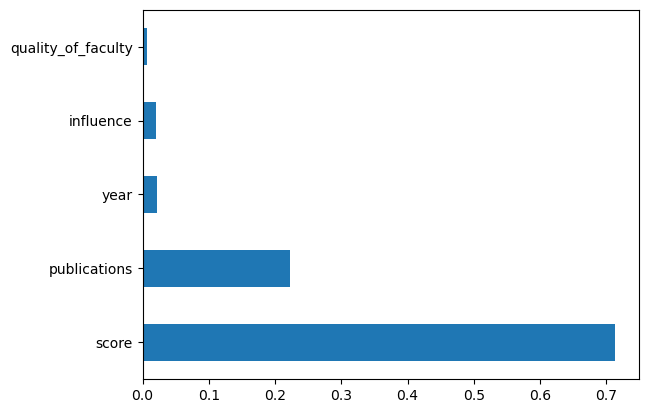

In [66]:
#check the top 5 important features
pd.Series(model.feature_importances_, index=X.columns).nlargest(5).plot(kind='barh')
plt.show()


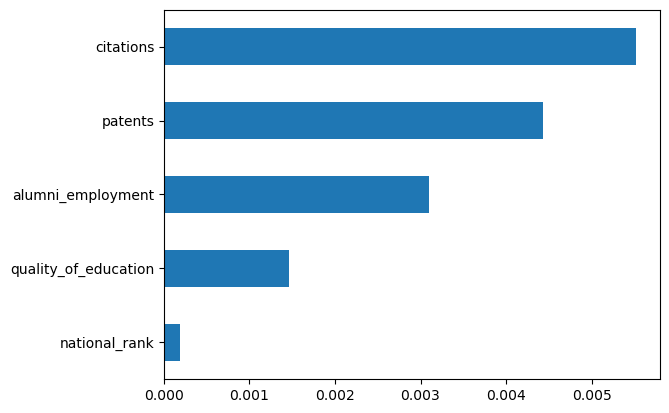

In [67]:
#check the top 5 least important features
pd.Series(model.feature_importances_, index=X.columns).nsmallest(5).plot(kind='barh')
plt.show()


In [68]:
from sklearn.ensemble import GradientBoostingRegressor
#fit the model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
#predict the values
y_pred = model.predict(X_test)
#check the accuracy
print('R2 score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
#additional accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSLE:', mean_squared_log_error(y_test, y_pred))


R2 score: 0.9967716325845167
RMSE: 17.27717258745226
MAE: 12.197775662189619
MSLE: 0.026229879567821062


In [70]:
#neural network
from sklearn.neural_network import MLPRegressor
#fit the model
model = MLPRegressor()
model.fit(X_train, y_train)
#predict the values
y_pred = model.predict(X_test)
#check the accuracy
print('R2 score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
#additional accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.9526125346021614
RMSE: 66.19313252270254
MAE: 45.656368212045756


d:\python\odyn\anak2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [71]:
#another model
from sklearn.neural_network import MLPRegressor
#fit the model
model = MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
model.fit(X_train, y_train)
#predict the values
y_pred = model.predict(X_test)
#check the accuracy
print('R2 score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
#additional accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSLE:', mean_squared_log_error(y_test, y_pred))


R2 score: 0.9518067343451037
RMSE: 66.75355078903203
MAE: 45.21558476805371
MSLE: 0.06630600282265874
